### A análise de dados socioeconômicos é fundamental para qualquer empresa compreender o  cenário  social  e  econômico  para  o  ambiente  de  negócios,  compreender  as  diferenças  entre regiões, cidades e países, a influência de indicadores nas decisões de compra dos clientes e como as mudanças no cenário podem impactar as estratégias corporativas.

### Neste    mini-projeto    são    aplicadas    técnicas    de    análise    exploratória em    dados socioeconômicos  reais  disponíveis  publicamente.  Por  se  tratar  de  dados  reais,  apresentam diversos problemas que serão tratados no processo de limpeza antes da análise
### Abaixo  o  link  da  fonte  de  dados  (os  dados  estão  sendo  fornecidos  a  você  ao  final  do capítulo):
https://data.world/laurel/world-happiness-report-data

#### Aqui estão as 5 perguntas de negócio que devem ser respondidas neste mini-projeto:
- Pergunta 1:O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer?Qual a correlação entre essas duas variáveis?
- Pergunta 2: Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?
- Pergunta 3: O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral?Qual a correlação entre essas duas variáveis?
- Pergunta 4: O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?
- Pergunta 5: Pessoas generosas são mais felizes?

In [1]:
library('dplyr')
library('corrplot')

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'corrplot' was built under R version 4.2.3"
corrplot 0.92 loaded



In [2]:
dados <- read.csv('dataset.csv')
head(dados,10) # Apresentação das 10 primeiras linhas dos dados
dim(dados) #Quantidade de linhas e colunas 

,Country.name,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
2,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
3,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
4,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
5,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
6,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
7,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
8,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
9,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348


[1] 1949   11

### Variáveis:
- País (Country.name)
- Ano (year)
- Índice de Felicidade (Life.Ladder)
- Logaritmo do PIB per capita (Log.GDP.per.capita), como o valor do PIB per capita pode ser muito grande, foi aplicado log nestes valores para facilitar a visualização.
- Apoio Social (Social.support)
- Expectativa de Vida Saudável ao Nascer (Healthy.life.expectancy.at.birth)
- Liberdade para Tomar Escolhas de Vida (Freedom.to.make.life.choices)
- Generosidade (Generosity)
- Percepções de Corrupção (Perceptions.of.corruption)
- Afeto Positivo (Positive.affect)
- Afeto Negativo (Negative.affect)

In [3]:
# Estrtura dos dados 
str(dados)

'data.frame':	1949 obs. of  11 variables:
 $ Country.name                    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ year                            : int  2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 ...
 $ Life.Ladder                     : num  3.72 4.4 4.76 3.83 3.78 ...
 $ Log.GDP.per.capita              : num  7.37 7.54 7.65 7.62 7.71 ...
 $ Social.support                  : num  0.451 0.552 0.539 0.521 0.521 0.484 0.526 0.529 0.559 0.491 ...
 $ Healthy.life.expectancy.at.birth: num  50.8 51.2 51.6 51.9 52.2 ...
 $ Freedom.to.make.life.choices    : num  0.718 0.679 0.6 0.496 0.531 0.578 0.509 0.389 0.523 0.427 ...
 $ Generosity                      : num  0.168 0.19 0.121 0.162 0.236 0.061 0.104 0.08 0.042 -0.121 ...
 $ Perceptions.of.corruption       : num  0.882 0.85 0.707 0.731 0.776 0.823 0.871 0.881 0.793 0.954 ...
 $ Positive.affect                 : num  0.518 0.584 0.618 0.611 0.71 0.621 0.532 0.554 0.565 0.496 ...
 $ Negative.affect     

In [4]:
#Resumo estatistico dos dados
summary(dados)

 Country.name            year       Life.Ladder    Log.GDP.per.capita
 Length:1949        Min.   :2005   Min.   :2.375   Min.   : 6.635    
 Class :character   1st Qu.:2010   1st Qu.:4.640   1st Qu.: 8.464    
 Mode  :character   Median :2013   Median :5.386   Median : 9.460    
                    Mean   :2013   Mean   :5.467   Mean   : 9.368    
                    3rd Qu.:2017   3rd Qu.:6.283   3rd Qu.:10.353    
                    Max.   :2020   Max.   :8.019   Max.   :11.648    
                                                   NA's   :36        
 Social.support   Healthy.life.expectancy.at.birth Freedom.to.make.life.choices
 Min.   :0.2900   Min.   :32.30                    Min.   :0.2580              
 1st Qu.:0.7498   1st Qu.:58.69                    1st Qu.:0.6470              
 Median :0.8355   Median :65.20                    Median :0.7630              
 Mean   :0.8126   Mean   :63.36                    Mean   :0.7426              
 3rd Qu.:0.9050   3rd Qu.:68.59         

In [5]:
# verificando valores nulos por coluna
data.frame(colSums(is.na(dados)))

,colSums.is.na.dados..
,<dbl>
Country.name,0
year,0
Life.Ladder,0
Log.GDP.per.capita,36
Social.support,13
Healthy.life.expectancy.at.birth,55
Freedom.to.make.life.choices,32
Generosity,89
Perceptions.of.corruption,110


In [6]:
# Quantas linhas têm casos completos?
# Verifica para cada linha se todos os valores estão preenchidos
casos_completos <- sum(complete.cases(dados))
casos_completos

[1] 1708

In [7]:
# Quantas linhas tem casos incompletos?
casos_incompletos <- sum(!complete.cases(dados))
casos_incompletos

[1] 241

In [8]:
# Qual o percentual de dados incompletos?
percentual <- (casos_incompletos / casos_completos) * 100
percentual

[1] 14.11007

In [9]:
# Remove os objetos anteriores para liberar memória RAM
rm(casos_completos)
rm(casos_incompletos)

In [10]:
# Criando um vetor para renomear as colunas:
novos_nomes <-c('Pais',
'Ano',
'Indice_felicidade',
'PIB_per_capita',
'Suporte_social',
'Expectativa_vida',
'Indicador_liberdade',
'Indicador_generosidade',
'Indicador_corrupcao',
'Afeto_positivo',
'Afeto_negativo')
novos_nomes

[1] "Pais"                   "Ano"                    "Indice_felicidade"     
 [4] "PIB_per_capita"         "Suporte_social"         "Expectativa_vida"      
 [7] "Indicador_liberdade"    "Indicador_generosidade" "Indicador_corrupcao"   
[10] "Afeto_positivo"         "Afeto_negativo"

In [11]:
#Renomeando
colnames(dados) <-novos_nomes

In [12]:
head(dados)

,Pais,Ano,Indice_felicidade,PIB_per_capita,Suporte_social,Expectativa_vida,Indicador_liberdade,Indicador_generosidade,Indicador_corrupcao,Afeto_positivo,Afeto_negativo
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
2,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
3,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
4,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
5,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
6,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273


###  Vamos adotar a estratégia de eliminar os dados ausentes, uma abordagem mais conservadora em comparação com a simples imputação de dados. Dado que estamos lidando frequentemente com informações socioeconômicas, caso decidíssemos utilizar dados de anos anteriores ou até mesmo de outros países, existe o risco de que esses dados não sejam totalmente confiáveis. Essa falta de confiabilidade poderia gerar problemas significativos durante a realização da análise exploratória e na geração de insights. Portanto, a remoção dos dados ausentes se mostra uma escolha mais cautelosa, visando preservar a integridade e a precisão de nossas análises.

In [13]:
# Verificando se há países que serão excluídos
# Contando valores unicos
length(unique(dados$Pais))

[1] 166

In [14]:
# Lista os países únicos e grava o resultado (antes de remover registros com valores NA)
paises_antes_na <- unique(dados$Pais)
paises_antes_na

[1] "Afghanistan"               "Albania"                  
  [3] "Algeria"                   "Angola"                   
  [5] "Argentina"                 "Armenia"                  
  [7] "Australia"                 "Austria"                  
  [9] "Azerbaijan"                "Bahrain"                  
 [11] "Bangladesh"                "Belarus"                  
 [13] "Belgium"                   "Belize"                   
 [15] "Benin"                     "Bhutan"                   
 [17] "Bolivia"                   "Bosnia and Herzegovina"   
 [19] "Botswana"                  "Brazil"                   
 [21] "Bulgaria"                  "Burkina Faso"             
 [23] "Burundi"                   "Cambodia"                 
 [25] "Cameroon"                  "Canada"                   
 [27] "Central African Republic"  "Chad"                     
 [29] "Chile"                     "China"                    
 [31] "Colombia"                  "Comoros"                  
 [33] "Congo (Brazzaville)"       "Congo (Kinshasa)"         
 [35] "Costa Rica"                "Croatia"                  
 [37] "Cuba"                      "Cyprus"                   
 [39] "Czech Republic"            "Denmark"                  
 [41] "Djibouti"                  "Dominican Republic"       
 [43] "Ecuador"                   "Egypt"                    
 [45] "El Salvador"               "Estonia"                  
 [47] "Ethiopia"                  "Finland"                  
 [49] "France"                    "Gabon"                    
 [51] "Gambia"                    "Georgia"                  
 [53] "Germany"                   "Ghana"                    
 [55] "Greece"                    "Guatemala"                
 [57] "Guinea"                    "Guyana"                   
 [59] "Haiti"                     "Honduras"                 
 [61] "Hong Kong S.A.R. of China" "Hungary"                  
 [63] "Iceland"                   "India"                    
 [65] "Indonesia"                 "Iran"                     
 [67] "Iraq"                      "Ireland"                  
 [69] "Israel"                    "Italy"                    
 [71] "Ivory Coast"               "Jamaica"                  
 [73] "Japan"                     "Jordan"                   
 [75] "Kazakhstan"                "Kenya"                    
 [77] "Kosovo"                    "Kuwait"                   
 [79] "Kyrgyzstan"                "Laos"                     
 [81] "Latvia"                    "Lebanon"                  
 [83] "Lesotho"                   "Liberia"                  
 [85] "Libya"                     "Lithuania"                
 [87] "Luxembourg"                "Madagascar"               
 [89] "Malawi"                    "Malaysia"                 
 [91] "Maldives"                  "Mali"                     
 [93] "Malta"                     "Mauritania"               
 [95] "Mauritius"                 "Mexico"                   
 [97] "Moldova"                   "Mongolia"                 
 [99] "Montenegro"                "Morocco"                  
[101] "Mozambique"                "Myanmar"                  
[103] "Namibia"                   "Nepal"                    
[105] "Netherlands"               "New Zealand"              
[107] "Nicaragua"                 "Niger"                    
[109] "Nigeria"                   "North Cyprus"             
[111] "North Macedonia"           "Norway"                   
[113] "Oman"                      "Pakistan"                 
[115] "Palestinian Territories"   "Panama"                   
[117] "Paraguay"                  "Peru"                     
[119] "Philippines"               "Poland"                   
[121] "Portugal"                  "Qatar"                    
[123] "Romania"                   "Russia"                   
[125] "Rwanda"                    "Saudi Arabia"             
[127] "Senegal"                   "Serbia"                   
[129] "Sierra Leone"              

In [15]:
# Vamos eliminar linhas com valores NA
dados <- na.omit(dados)
dim(dados)

[1] 1708   11

In [16]:
#Contagem de paises após NA
length(unique(dados$Pais))

[1] 155

In [17]:
#Lista os países únicos após NA
paises_depois_na <- unique(dados$Pais)

In [18]:
# Verificando a diferença antes e depois de remover valores NA
setdiff(paises_antes_na, paises_depois_na)

[1] "China"                     "Cuba"                     
 [3] "Hong Kong S.A.R. of China" "Kosovo"                   
 [5] "Maldives"                  "North Cyprus"             
 [7] "Oman"                      "Somalia"                  
 [9] "Somaliland region"         "South Sudan"              
[11] "Turkmenistan"

In [19]:
rm(paises_depois_na,paises_antes_na)

In [20]:
# Verificando quais anos estão presentes nos dados
unique(dados$Ano)

[1] 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2007 2020 2006
[16] 2005

In [21]:
range(dados$Ano)

[1] 2005 2020

In [22]:
# Número de registros por ano
frequencia_anos <- table(dados$Ano)
frequencia_anos 


2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 
   1   74   94  101  106  112  132  121  124  127  127  124  132  126  126   81 

In [23]:
#Vamos optar por remover todos os anos que tiveram uma contagem menor que 100.
anos_remover <- names(frequencia_anos[frequencia_anos < 100])
anos_remover 

[1] "2005" "2006" "2007" "2020"

In [24]:
# Criando um novo conjunto de dados excluindo os anos identificados
dados <- dados[!(dados$Ano %in% anos_remover), ]

In [25]:
#Contagem de paises após remoção dos anos
length(unique(dados$Pais))

[1] 154

In [26]:
dim(dados)

[1] 1458   11

In [27]:
table(dados$Ano)


2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 
 101  106  112  132  121  124  127  127  124  132  126  126 

In [28]:
#Extraindo as variáveis numericas: Primeiro pelo método sapply
variaveis_numericas <- sapply(dados, is.numeric) #sapply aplica a função is.numeric a cada coluna. 
variaveis_numericas

Pais                    Ano      Indice_felicidade 
                 FALSE                   TRUE                   TRUE 
        PIB_per_capita         Suporte_social       Expectativa_vida 
                  TRUE                   TRUE                   TRUE 
   Indicador_liberdade Indicador_generosidade    Indicador_corrupcao 
                  TRUE                   TRUE                   TRUE 
        Afeto_positivo         Afeto_negativo 
                  TRUE                   TRUE

In [29]:
dados_numericos <- dados[variaveis_numericas]
head(dados_numericos)
dim(dados_numericos)

,Ano,Indice_felicidade,PIB_per_capita,Suporte_social,Expectativa_vida,Indicador_liberdade,Indicador_generosidade,Indicador_corrupcao,Afeto_positivo,Afeto_negativo
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
2,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
3,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
4,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
5,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
6,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273


[1] 1458   10

In [30]:
#Usando select
dados_numericos_a <- select_if(dados, is.numeric)
head(dados_numericos_a)
dim(dados_numericos_a)

,Ano,Indice_felicidade,PIB_per_capita,Suporte_social,Expectativa_vida,Indicador_liberdade,Indicador_generosidade,Indicador_corrupcao,Afeto_positivo,Afeto_negativo
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
2,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
3,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
4,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
5,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
6,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273


[1] 1458   10

In [31]:
matriz_cor <- cor(dados_numericos)
matriz_cor

,Ano,Indice_felicidade,PIB_per_capita,Suporte_social,Expectativa_vida,Indicador_liberdade,Indicador_generosidade,Indicador_corrupcao,Afeto_positivo,Afeto_negativo
Ano,1.00000000,0.02236586,0.050371225,0.01096172,0.12888737,0.2445672,-0.034251879,-0.08141031,0.02247053,0.20734596
Indice_felicidade,0.02236586,1.00000000,0.789007821,0.71419311,0.75711629,0.5160062,0.188541730,-0.43380056,0.53476358,-0.31011272
PIB_per_capita,0.05037122,0.78900782,1.000000000,0.70655046,0.86227595,0.3440583,-0.008470999,-0.33223842,0.29964156,-0.24011205
Suporte_social,0.01096172,0.71419311,0.706550456,1.00000000,0.62088952,0.4099891,0.064480877,-0.22074476,0.45386308,-0.43336714
Expectativa_vida,0.12888737,0.75711629,0.862275954,0.62088952,1.00000000,0.3786709,0.032975384,-0.33150124,0.32991905,-0.16962055
Indicador_liberdade,0.24456723,0.51600618,0.344058263,0.40998909,0.37867085,1.0000000,0.333592355,-0.48157289,0.62355293,-0.28090352
Indicador_generosidade,-0.03425188,0.18854173,-0.008470999,0.06448088,0.03297538,0.3335924,1.000000000,-0.29779956,0.36830152,-0.08727321
Indicador_corrupcao,-0.08141031,-0.43380056,-0.332238416,-0.22074476,-0.33150124,-0.4815729,-0.297799559,1.00000000,-0.29986176,0.27840008
Afeto_positivo,0.02247053,0.53476358,0.299641559,0.45386308,0.32991905,0.6235529,0.368301521,-0.29986176,1.00000000,-0.36854356
Afeto_negativo,0.20734596,-0.31011272,-0.240112048,-0.43336714,-0.16962055,-0.2809035,-0.087273212,0.27840008,-0.36854356,1.00000000


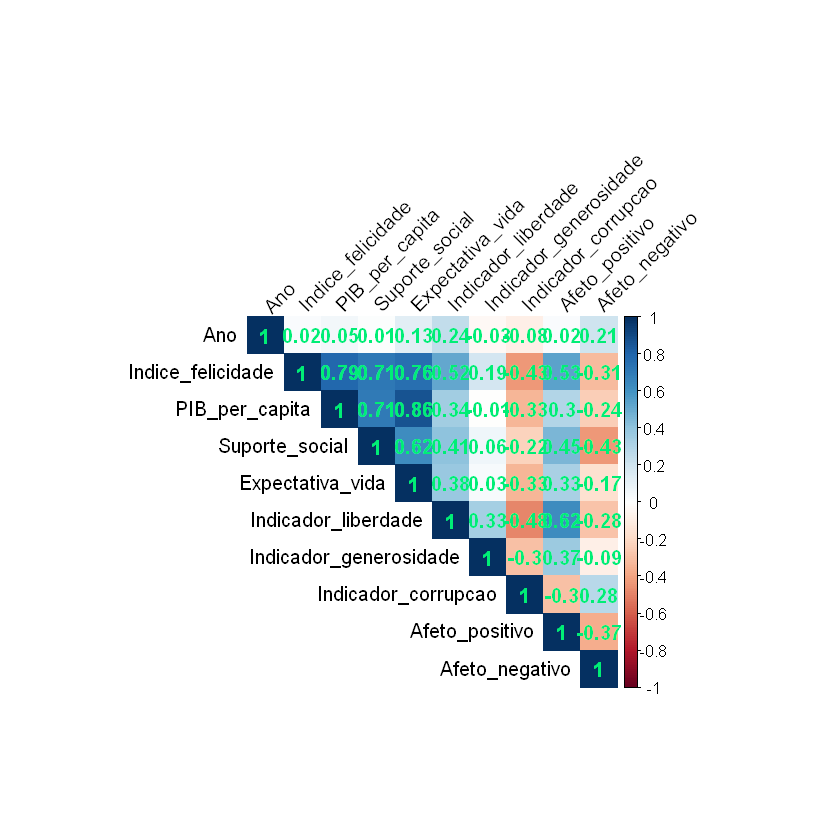

In [32]:
corrplot(matriz_cor, method = 'color', type = 'upper', addCoef.col = 'springgreen2', tl.col = "black", tl.srt = 45) 

## Perguntas de negócios:

- Para facilitar a visualização e exploração vamos agrupar os dados por país, infelizmente neste processo os dados por ano serão perdidos, mas como não estamos analisando dados socioeconômicos por ano, podemos utilizar esta abordagem:

In [33]:
# Agrupando os dados e calculando média por país
pib_pais <- dados %>%
  group_by(Pais) %>% #Agrupando os dados com base na coluna pais
  summarize(PIB_per_capita = mean(PIB_per_capita)) #criando uma coluna chamada PIB_Per_Capita com a media da coluna ja existente

In [34]:
head(pib_pais)

Pais,PIB_per_capita
<chr>,<dbl>
Afghanistan,7.650833
Albania,9.396182
Algeria,9.329400
Angola,8.990000
Argentina,10.058083
Armenia,9.296667


In [35]:
Indice_felicidade_pais <- dados %>% group_by(Pais) %>% summarize(Indice_felicidade = mean(Indice_felicidade))
head(Indice_felicidade_pais)

Pais,Indice_felicidade
<chr>,<dbl>
Afghanistan,3.594667
Albania,5.023000
Algeria,5.191800
Angola,4.420250
Argentina,6.363750
Armenia,4.501583


In [36]:
supor_social_pais <- dados %>% group_by(Pais) %>% summarize(Suporte_social = mean(Suporte_social))
head(supor_social_pais)

Pais,Suporte_social
<chr>,<dbl>
Afghanistan,0.5084167
Albania,0.7072727
Algeria,0.8116000
Angola,0.7382500
Argentina,0.9057500
Armenia,0.7181667


In [37]:
Expectativa_vida_pais <- dados %>% group_by(Pais) %>% summarize(Expectativa_vida = mean(Expectativa_vida))
head(Expectativa_vida_pais)

Pais,Expectativa_vida
<chr>,<dbl>
Afghanistan,52.26667
Albania,67.54545
Algeria,65.43600
Angola,53.55000
Argentina,67.96167
Armenia,65.89167


In [38]:
Indicador_liberdade_pais <- dados %>% group_by(Pais) %>% summarize(Indicador_liberdade = mean(Indicador_liberdade))
head(Indicador_liberdade_pais)

Pais,Indicador_liberdade
<chr>,<dbl>
Afghanistan,0.5181667
Albania,0.6668182
Algeria,0.5044000
Angola,0.4562500
Argentina,0.7761667
Armenia,0.5639167


In [39]:
Indicador_generosidade_pais <- dados %>% group_by(Pais) %>% summarize(Indicador_generosidade = mean(Indicador_generosidade))
head(Indicador_generosidade_pais)

Pais,Indicador_generosidade
<chr>,<dbl>
Afghanistan,0.07008333
Albania,-0.09754545
Algeria,-0.13220000
Angola,-0.08825000
Argentina,-0.16483333
Armenia,-0.19275000


In [40]:
Indicador_corrupcao_pais <- dados %>% group_by(Pais) %>% summarize(Indicador_corrupcao = mean(Indicador_corrupcao))
head(Indicador_corrupcao_pais)

Pais,Indicador_corrupcao
<chr>,<dbl>
Afghanistan,0.8433333
Albania,0.8669091
Algeria,0.7056000
Angola,0.8667500
Argentina,0.8401667
Armenia,0.8486667


In [41]:
Afeto_positivo_pais <- dados %>% group_by(Pais) %>% summarize(Afeto_positivo = mean(Afeto_positivo))
head(Afeto_positivo_pais)

Pais,Afeto_positivo
<chr>,<dbl>
Afghanistan,0.5486667
Albania,0.6607273
Algeria,0.5944000
Angola,0.6135000
Argentina,0.8404167
Armenia,0.5585000


In [42]:
Afeto_negativo_pais <- dados %>% group_by(Pais) %>% summarize(Afeto_negativo = mean(Afeto_negativo))
head(Afeto_negativo_pais)

Pais,Afeto_negativo
<chr>,<dbl>
Afghanistan,0.3265000
Albania,0.3071818
Algeria,0.2564000
Angola,0.3512500
Argentina,0.2759167
Armenia,0.4330000


In [43]:
#Combinando os dfs com a função merge
dados_combinados <- merge(pib_pais, Indice_felicidade_pais)
dados_combinados <- merge(dados_combinados, supor_social_pais)
dados_combinados <- merge(dados_combinados, Expectativa_vida_pais)
dados_combinados <- merge(dados_combinados, Indicador_liberdade_pais)
dados_combinados <- merge(dados_combinados, Indicador_generosidade_pais)
dados_combinados <- merge(dados_combinados, Indicador_corrupcao_pais)
dados_combinados <- merge(dados_combinados, Afeto_positivo_pais)
dados_combinados <- merge(dados_combinados, Afeto_negativo_pais)

head(dados_combinados)
dim(dados_combinados)

,Pais,PIB_per_capita,Indice_felicidade,Suporte_social,Expectativa_vida,Indicador_liberdade,Indicador_generosidade,Indicador_corrupcao,Afeto_positivo,Afeto_negativo
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,7.650833,3.594667,0.5084167,52.26667,0.5181667,0.07008333,0.8433333,0.5486667,0.3265000
2,Albania,9.396182,5.023000,0.7072727,67.54545,0.6668182,-0.09754545,0.8669091,0.6607273,0.3071818
3,Algeria,9.329400,5.191800,0.8116000,65.43600,0.5044000,-0.13220000,0.7056000,0.5944000,0.2564000
4,Angola,8.990000,4.420250,0.7382500,53.55000,0.4562500,-0.08825000,0.8667500,0.6135000,0.3512500
5,Argentina,10.058083,6.363750,0.9057500,67.96167,0.7761667,-0.16483333,0.8401667,0.8404167,0.2759167
6,Armenia,9.296667,4.501583,0.7181667,65.89167,0.5639167,-0.19275000,0.8486667,0.5585000,0.4330000


[1] 154  10

In [44]:
# Remover os dataframes originais
rm(pib_pais, Indice_felicidade_pais, supor_social_pais, Expectativa_vida_pais,
   Indicador_liberdade_pais, Indicador_generosidade_pais, Indicador_corrupcao_pais,
   Afeto_positivo_pais, Afeto_negativo_pais)

### Pergunta 1:O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer?Qual a correlação entre essas duas variáveis?

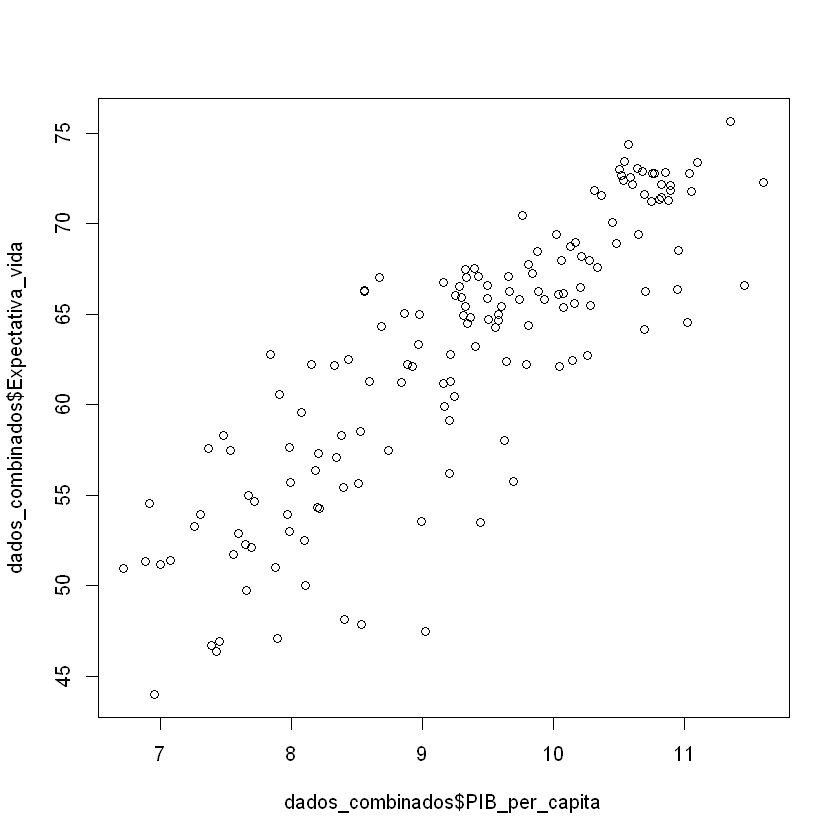

In [45]:
plot(dados_combinados$PIB_per_capita, dados_combinados$Expectativa_vida)

Analisando o gráfico, observa-se uma relação positiva entre o crescimento do Produto Interno Bruto (PIB) - representado pela variável x - e a expectativa de vida - representada pela variável y.

In [46]:
#fazendo um teste de correlação de Pearson,
cor.test(dados_combinados$PIB_per_capita, dados_combinados$Expectativa_vida, method = 'pearson')


	Pearson's product-moment correlation

data:  dados_combinados$PIB_per_capita and dados_combinados$Expectativa_vida
t = 20.197, df = 152, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8039014 0.8913678
sample estimates:
      cor 
0.8535384 


- Conforme descrito acima, o  valor-p é muito pequeno, indicando que a correlação observada é estatisticamente significativa.
- Há uma confiança de 95% de que a verdadeira correlação entre as variáveis está entre 0.8039014 e 0.8913678.
- E a correlação amostral é de aproximadamente 0.8535.
- Desta forma, o resultado sugere que há uma forte correlação positiva (0.8535) entre as variáveis PIB_per_capita e Expectativa_vida no conjunto de dados. 

### Pergunta 2: Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?

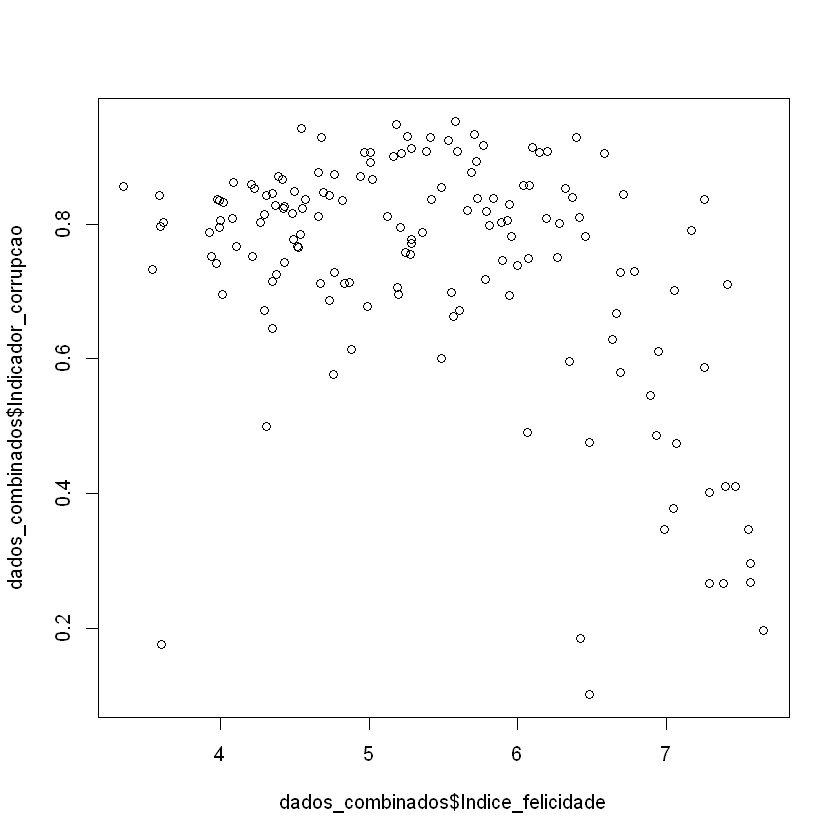

In [47]:
plot(dados_combinados$Indice_felicidade, dados_combinados$Indicador_corrupcao)

In [48]:
cor.test(dados_combinados$Expectativa_vida, dados_combinados$Indicador_corrupcao, method = 'pearson')


	Pearson's product-moment correlation

data:  dados_combinados$Expectativa_vida and dados_combinados$Indicador_corrupcao
t = -4.147, df = 152, p-value = 5.583e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4540764 -0.1691819
sample estimates:
       cor 
-0.3188118 


### Pergunta 3: O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral?Qual a correlação entre essas duas variáveis?

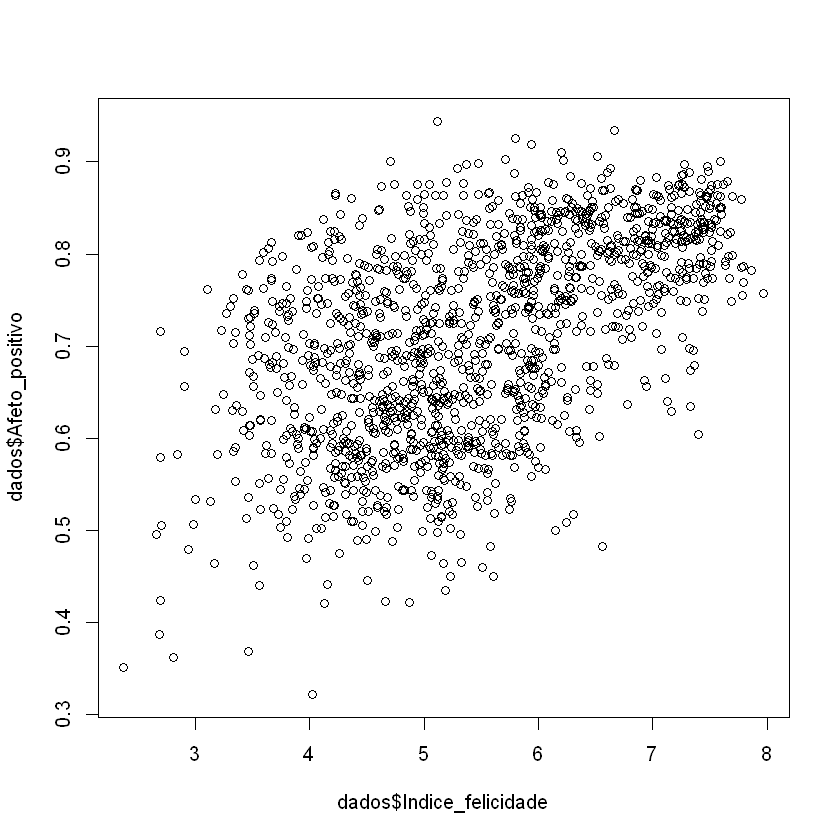

In [49]:
plot(dados$Indice_felicidade, dados$Afeto_positivo)

In [50]:
cor.test(dados$Indice_felicidade, dados$Afeto_positivo, method= 'pearson')


	Pearson's product-moment correlation

data:  dados$Indice_felicidade and dados$Afeto_positivo
t = 24.148, df = 1456, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4970724 0.5704405
sample estimates:
      cor 
0.5347636 


### Pergunta 4: O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?

In [51]:
#Procurando o indice com menor valor da coluna suporte social
pais_suporte <- dados_combinados[which.min(dados_combinados$Suporte_social), ]
pais_suporte

,Pais,PIB_per_capita,Indice_felicidade,Suporte_social,Expectativa_vida,Indicador_liberdade,Indicador_generosidade,Indicador_corrupcao,Afeto_positivo,Afeto_negativo
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,Central African Republic,6.9545,3.35375,0.37,43.97,0.68475,0.0135,0.857,0.56,0.40675


In [52]:
max(dados_combinados$Indicador_corrupcao)
min(dados_combinados$Indicador_corrupcao)

[1] 0.9532727

[1] 0.1009091

Conforme observado anteriormente, o país que registra o menor índice de suporte social também exibe uma percepção de corrupção significativamente elevada, embora não alcance o valor máximo, permanece bastante próximo desse patamar.

### Pergunta 5: Pessoas generosas são mais felizes?

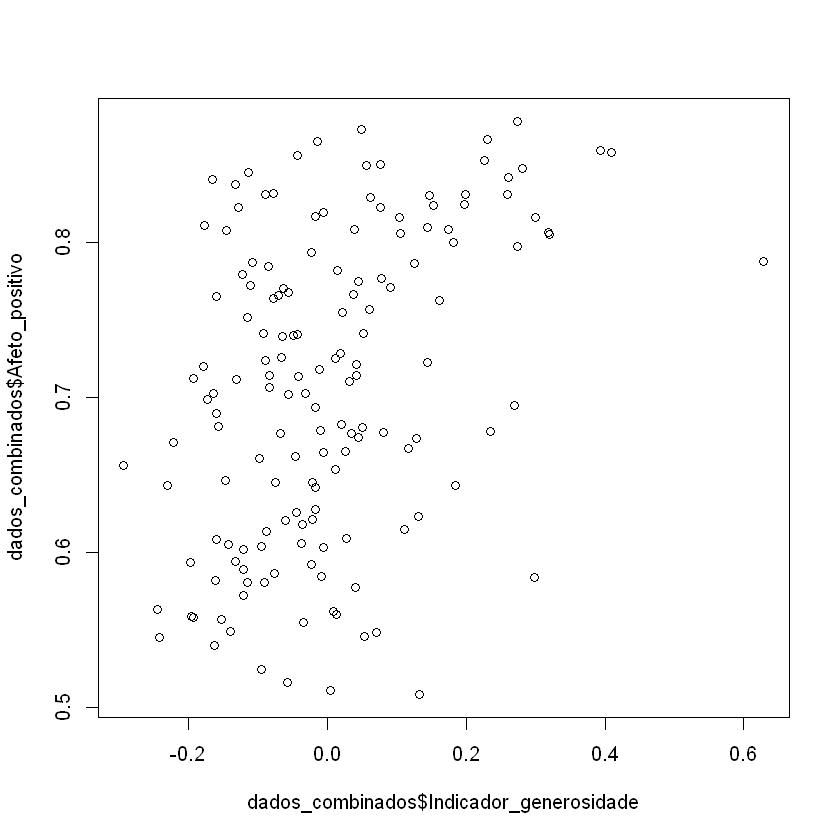

In [53]:
plot(dados_combinados$Indicador_generosidade, dados_combinados$Afeto_positivo)

In [54]:
cor.test(dados_combinados$Indicador_generosidade, dados_combinados$Afeto_positivo, method = 'pearson')


	Pearson's product-moment correlation

data:  dados_combinados$Indicador_generosidade and dados_combinados$Afeto_positivo
t = 5.4193, df = 152, p-value = 2.299e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2608430 0.5270213
sample estimates:
      cor 
0.4024025 
